<a href="https://colab.research.google.com/github/aakashkumarme/MLAlgo/blob/main/Polynomial_Regression_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polynomial regression is a machine learning algorithm that is used to train a linear model on non-linear data. Sometimes your data is much more complex than a straight line, in such cases, it is not a good option to train a linear model like a linear regression algorithm, but surprisingly, we can use the polynomial regression algorithm to add the powers of each feature as the new features and then train a linear model on the extended set of features. This is how this algorithm works.

  In machine learning, the polynomial regression algorithm allows you to use a linear model even when the data has very strong nonlinearities. It works by adding additional features to the data by understanding existing features.

Implementation strategy:

To implement this algorithm, you have to first train a linear model on a non-linear dataset, let’s say we want to train a linear regression algorithm on non-linear data which will be giving us bad results. So in such cases, we need to add some new features by understanding the existing features to make our dataset linear. For this task, we need to use the polynomial regression algorithm which transforms the data into an expanded one and then if we will use the linear regression algorithm again on the newly transformed data it will give us the perfect results.

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test))

0.7429889597086833


In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
xp = pf.fit_transform(boston.data)
lr = LinearRegression(normalize=True)
lr.fit(xp, boston.target)

print(lr.score(xp, boston.target))

0.9238729081687503


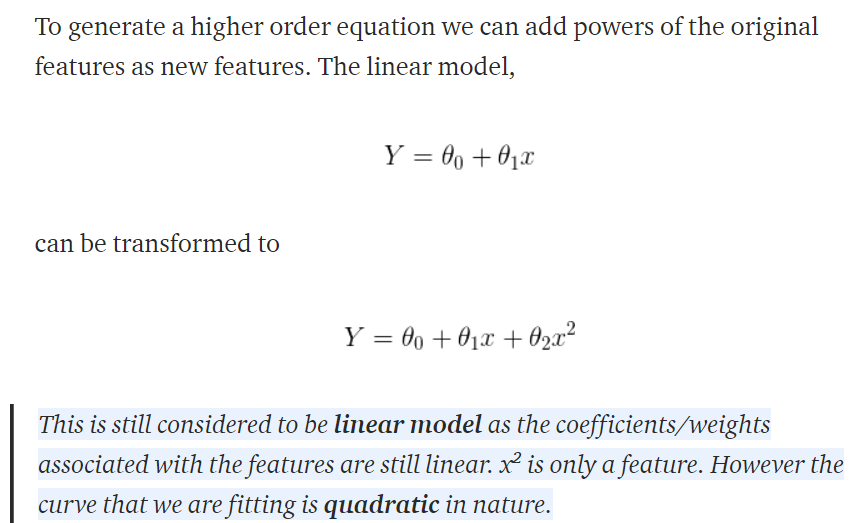

So after training the same model on the extended features we are getting a score of 0.92 which is not bad.

It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.

The relationship is measured with a value called the r-squared.

The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.


In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

To prevent over-fitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized.

The Bias vs Variance trade-off
Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.
Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.
Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made.
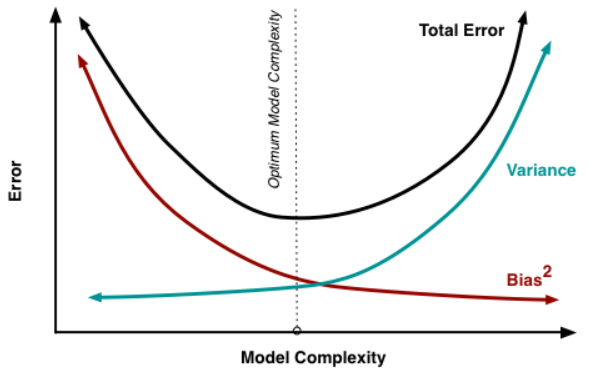#Exa

10.120437473614711
0.8537647164420812


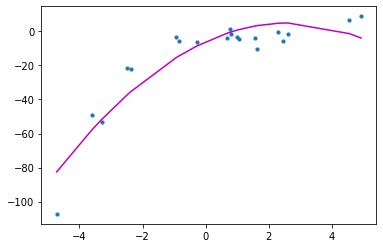

In [14]:
#Example

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()